# SpaceX Falcon 9 First Stage Landing Prediction: EDA and Feature Engineering

This notebook performs Exploratory Data Analysis and Feature Engineering on SpaceX Falcon 9 launch data.

Key components:

* Data loading and initial exploration
* Visualization of relationships between various features
* Analysis of launch success trends
* Feature selection and engineering
* Creation of dummy variables for categorical columns
* Data type conversion and export

## 1. Setup

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Constants
DATA_URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

## 2. Data Loading

In [15]:
df = pd.read_csv(DATA_URL)
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


## 3. Exploratory Data Analysis

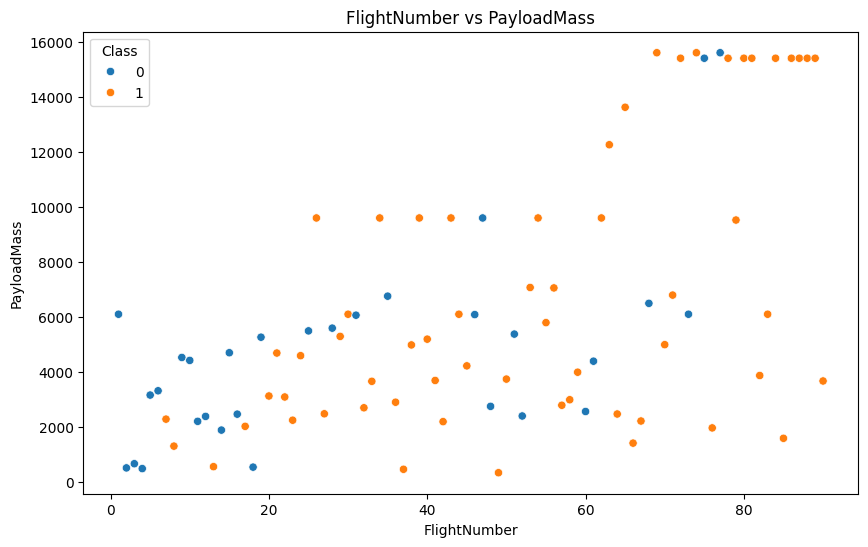

In [16]:
# Visualize FlightNumber vs PayloadMass
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FlightNumber', y='PayloadMass', hue='Class', data=df)
plt.title('FlightNumber vs PayloadMass')
plt.show()

### TASK 1: Visualize FlightNumber vs LaunchSite

<Figure size 1000x600 with 0 Axes>

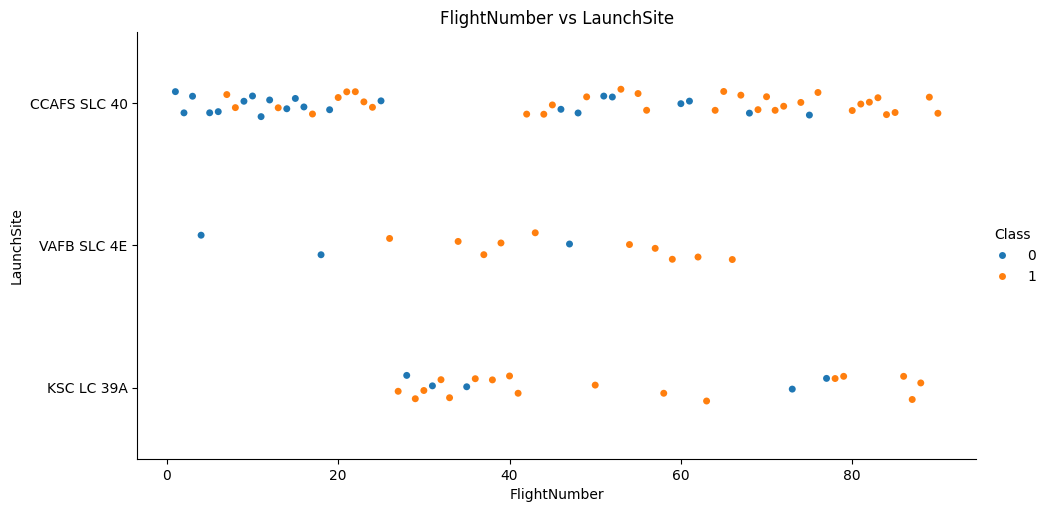

In [17]:
plt.figure(figsize=(10, 6))
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df, aspect=2)
plt.title('FlightNumber vs LaunchSite')
plt.show()

### TASK 2: Visualize PayloadMass vs LaunchSite

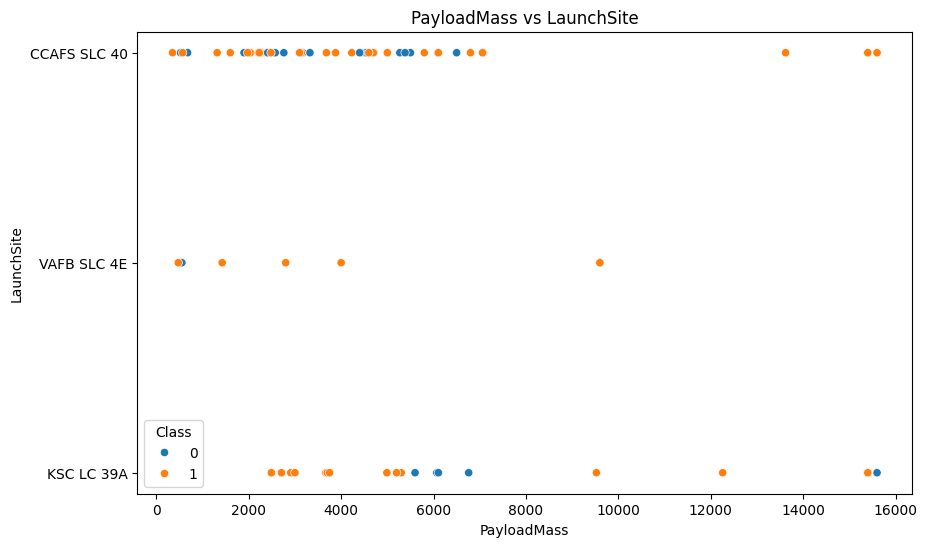

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df)
plt.title('PayloadMass vs LaunchSite')
plt.show()

### TASK 3: Visualize success rate of each orbit type

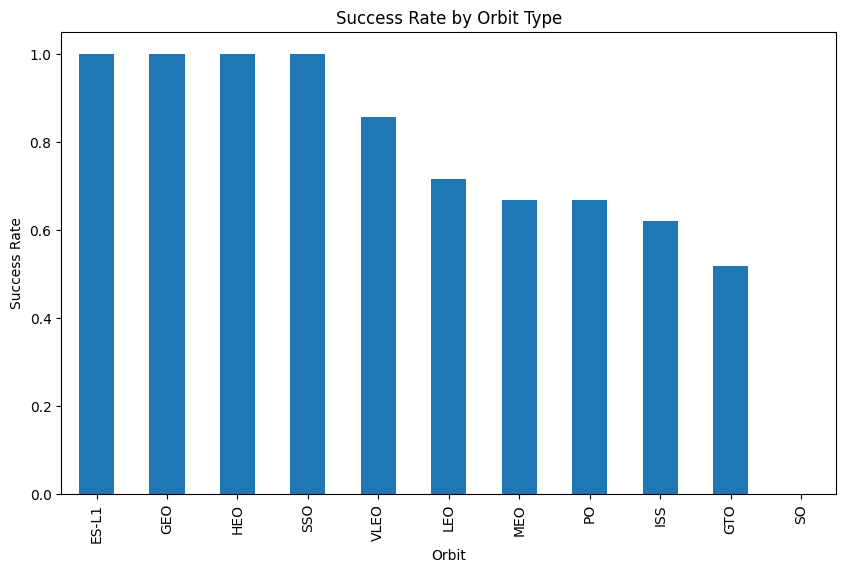

In [19]:
orbit_success = df.groupby('Orbit')['Class'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
orbit_success.plot(kind='bar')
plt.title('Success Rate by Orbit Type')
plt.ylabel('Success Rate')
plt.show()

### TASK 4: Visualize FlightNumber vs Orbit

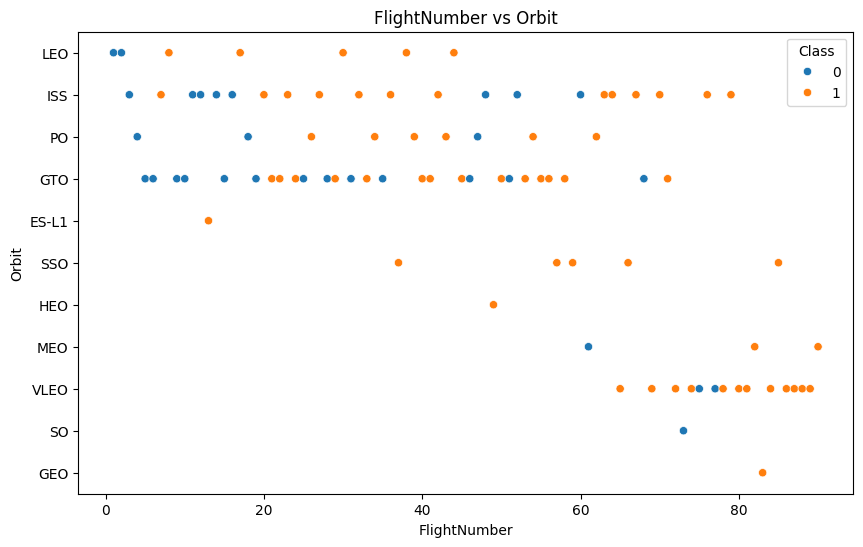

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=df)
plt.title('FlightNumber vs Orbit')
plt.show()

### TASK 5: Visualize PayloadMass vs Orbit

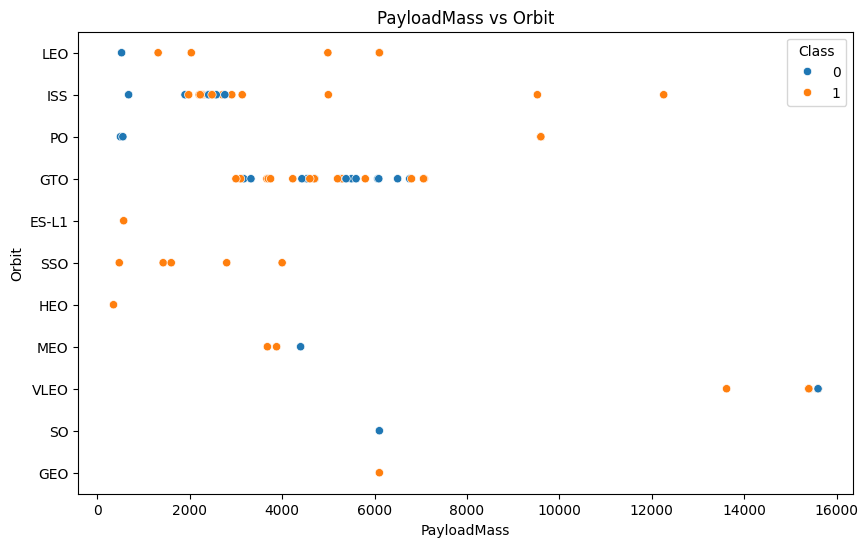

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=df)
plt.title('PayloadMass vs Orbit')
plt.show()

### TASK 6: Visualize launch success yearly trend

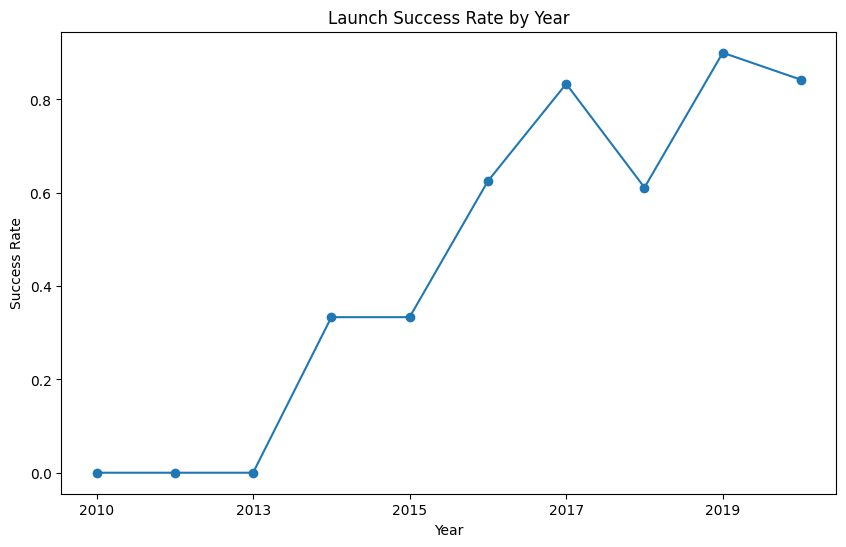

In [22]:
def Extract_year():
    return [i.split("-")[0] for i in df["Date"]]

df['Year'] = Extract_year()
yearly_success = df.groupby('Year')['Class'].mean()
plt.figure(figsize=(10, 6))
yearly_success.plot(kind='line', marker='o')
plt.title('Launch Success Rate by Year')
plt.ylabel('Success Rate')
plt.show()

## 4. Feature Engineering

In [23]:
# Select features for prediction
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
print("\nSelected features:")
display(features.head())


Selected features:


,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK 7: Create dummy variables for categorical columns

In [24]:
categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
features_one_hot = pd.get_dummies(features, columns=categorical_columns)
print("\nFeatures with dummy variables:")
display(features_one_hot.head())


Features with dummy variables:


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK 8: Cast all numeric columns to float64

In [25]:
features_one_hot = features_one_hot.astype('float64')
print("\nDataFrame info after casting to float64:")
display(features_one_hot.info())


DataFrame info after casting to float64:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     float64
 3   GridFins                             90 non-null     float64
 4   Reused                               90 non-null     float64
 5   Legs                                 90 non-null     float64
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     float64
 8   Orbit_ES-L1                          90 non-null     float64
 9   Orbit_GEO                            90 non-null     float64
 10  Orbit_GTO                            90 non-null     float

None

## 5. Data Export

In [26]:
# Export processed data to CSV
features_one_hot.to_csv('dataset_part_3.csv', index=False)
print("\nData exported to 'dataset_part_3.csv'")


Data exported to 'dataset_part_3.csv'
